In [141]:
#%tensorflow_version 1.x
import os
import datetime as dt

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [142]:
df_bit = pd.read_csv("data/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")
df_coin = pd.read_csv("data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")

In [143]:
df_bit.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [144]:
df_bit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Timestamp,4363457.0,1.456469e+09,7.573296e+07,1.325318e+09,1.390770e+09,1.456610e+09,1.522062e+09,1.587514e+09
Open,3126480.0,3.674656e+03,3.935578e+03,3.800000e+00,4.100000e+02,1.175140e+03,6.931175e+03,1.966576e+04
High,3126480.0,3.677366e+03,3.939077e+03,3.800000e+00,4.102400e+02,1.175770e+03,6.935780e+03,1.966600e+04
Low,3126480.0,3.671730e+03,3.931713e+03,1.500000e+00,4.098300e+02,1.174825e+03,6.926790e+03,1.964996e+04
Close,3126480.0,3.674595e+03,3.935490e+03,1.500000e+00,4.100000e+02,1.175140e+03,6.931225e+03,1.966575e+04
Volume_(BTC),3126480.0,9.855040e+00,3.229272e+01,0.000000e+00,3.988120e-01,1.990000e+00,7.639098e+00,5.853852e+03
Volume_(Currency),3126480.0,2.884459e+04,1.010277e+05,0.000000e+00,3.503759e+02,2.620491e+03,1.760057e+04,7.569437e+06
Weighted_Price,3126480.0,3.674570e+03,3.935458e+03,3.800000e+00,4.099998e+02,1.175200e+03,6.931180e+03,1.966330e+04


In [145]:
df_coin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Timestamp,2099760.0,1.483899e+09,3.638214e+07,1.417412e+09,1.452410e+09,1.483906e+09,1.515402e+09,1.546899e+09
Open,1990691.0,3.246403e+03,3.799154e+03,6.000000e-02,4.195800e+02,1.014580e+03,6.322630e+03,1.989199e+04
High,1990691.0,3.247829e+03,3.801394e+03,6.000000e-02,4.196400e+02,1.014890e+03,6.324010e+03,1.989199e+04
Low,1990691.0,3.244856e+03,3.796761e+03,6.000000e-02,4.195000e+02,1.014150e+03,6.321090e+03,1.989198e+04
Close,1990691.0,3.246403e+03,3.799150e+03,6.000000e-02,4.195700e+02,1.014530e+03,6.322670e+03,1.989199e+04
Volume_(BTC),1990691.0,7.849139e+00,1.873222e+01,1.000000e-08,9.024000e-01,2.692900e+00,7.600965e+00,1.563267e+03
Volume_(Currency),1990691.0,3.600157e+04,1.401879e+05,2.641700e-06,6.440031e+02,3.695642e+03,1.972392e+04,1.997076e+07
Weighted_Price,1990691.0,3.246341e+03,3.799078e+03,6.000000e-02,4.195645e+02,1.014512e+03,6.322550e+03,1.989199e+04


In [146]:
df_coin['Timestamp'] = pd.to_datetime(df_coin['Timestamp'], unit='s')
df_bit['Timestamp'] = pd.to_datetime(df_bit['Timestamp'], unit='s')

In [147]:
df_bit['Timestamp'].head()

0   2011-12-31 07:52:00
1   2011-12-31 07:53:00
2   2011-12-31 07:54:00
3   2011-12-31 07:55:00
4   2011-12-31 07:56:00
Name: Timestamp, dtype: datetime64[ns]

In [148]:
print(df_bit.isnull().sum())

Timestamp                  0
Open                 1236977
High                 1236977
Low                  1236977
Close                1236977
Volume_(BTC)         1236977
Volume_(Currency)    1236977
Weighted_Price       1236977
dtype: int64


In [149]:
print(df_bit.index)
print(df_coin.index)

RangeIndex(start=0, stop=4363457, step=1)
RangeIndex(start=0, stop=2099760, step=1)


In [150]:
new_df = pd.concat([df_bit, df_coin], ignore_index=True)

In [151]:
len(new_df)

6463217

In [152]:
new_df.drop_duplicates(subset ="Timestamp", inplace = True)

In [153]:
new_df.duplicated().sort_values(ascending=False)

4368710    False
1454858    False
1454872    False
1454871    False
1454870    False
           ...  
2909722    False
2909721    False
2909720    False
2909719    False
0          False
Length: 4364593, dtype: bool

In [154]:
new_df.shape

(4364593, 8)

In [155]:
new_df.index = new_df['Timestamp']
new_df[new_df.columns.values] = new_df[new_df.columns.values].ffill()
new_df = new_df.resample('H').agg({'Open': 'mean', 'High': 'mean', 'Low': 'mean',
                                       'Close': 'mean', 'Volume_(BTC)': 'sum',
                                       'Volume_(Currency)': 'sum', 'Weighted_Price': 'mean'})

In [156]:
new_df.shape

(72834, 7)

In [157]:
print(new_df.isnull().sum())

Open                 87
High                 87
Low                  87
Close                87
Volume_(BTC)          0
Volume_(Currency)     0
Weighted_Price       87
dtype: int64


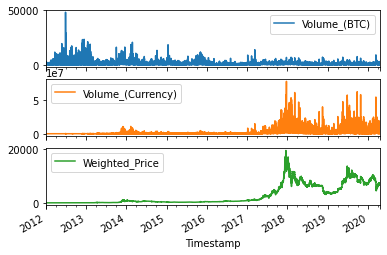

In [158]:
plot_cols = ['Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
plot_features = new_df[plot_cols]
plot_features.index = new_df.index
_ = plot_features.plot(subplots=True)

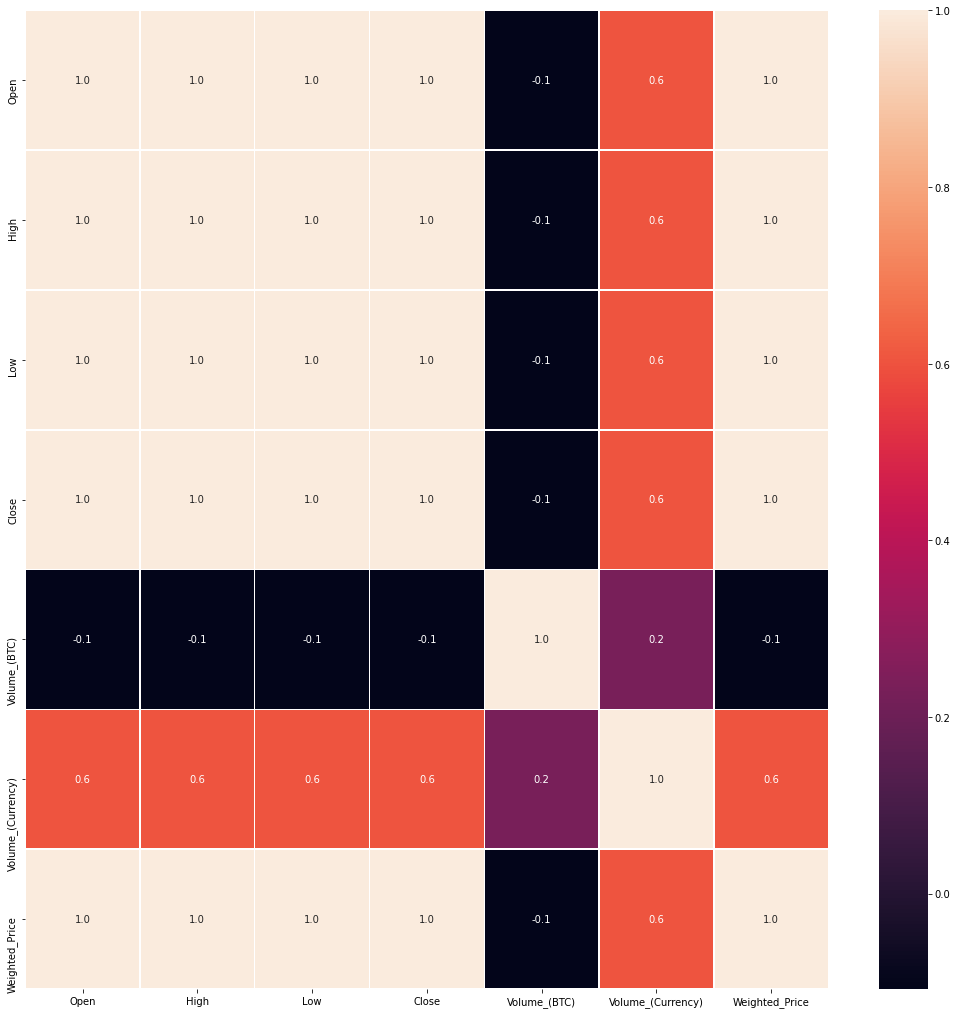

In [159]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(new_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [160]:
days = 730
split_time = int(days*0.8*24) # length of training dataset

n = len(new_df)

train_df = new_df[0:int(n*0.7)]
val_df = new_df[int(n*0.7):int(n*0.9)]
test_df = new_df[int(n*0.9):]

train_mean = new_df[:split_time].mean()
train_std = new_df[:split_time].std()
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

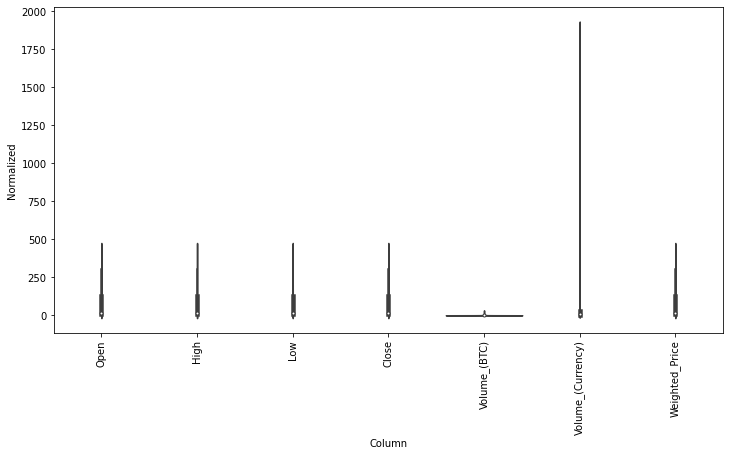

In [161]:
df_std = (new_df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(new_df.keys(), rotation=90)

In [162]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [163]:
w2 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Close'])
w2

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Close']

In [164]:
    def split_window(self, features):
      inputs = features[:, self.input_slice, :]
      labels = features[:, self.labels_slice, :]
      if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
      inputs.set_shape([None, self.input_width, None])
      labels.set_shape([None, self.label_width, None])

      return inputs, labels

WindowGenerator.split_window = split_window

In [165]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 48, 7)
Inputs shape: (3, 24, 7)
labels shape: (3, 1, 1)


In [166]:
w2.example = example_inputs, example_labels

In [167]:
    def plot(self, model=None, plot_col='Close', max_subplots=3):
      inputs, labels = self.example
      plt.figure(figsize=(12, 8))
      plot_col_index = self.column_indices[plot_col]
      max_n = min(max_subplots, len(inputs))
      for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
          label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
          label_col_index = plot_col_index

        if label_col_index is None:
          continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
          predictions = model(inputs)
          plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
          plt.legend()

      plt.xlabel('Close')

WindowGenerator.plot = plot


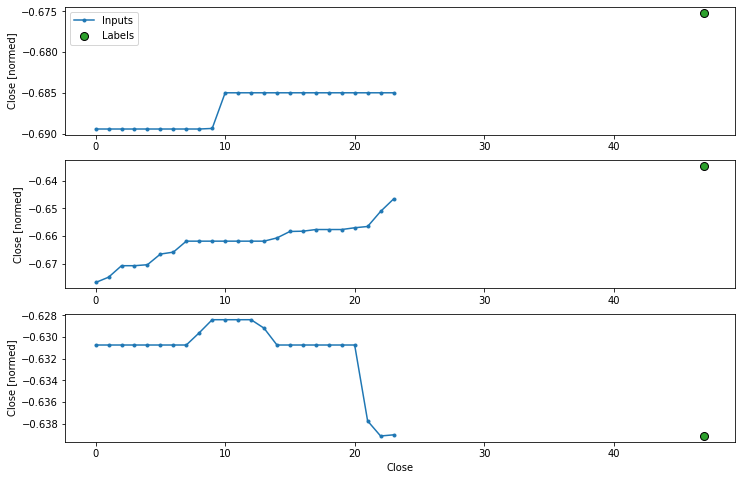

In [168]:
w2.plot()

In [169]:
    def make_dataset(self, data):
      data = np.array(data, dtype=np.float32)
      ds = tf.keras.preprocessing.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

      ds = ds.map(self.split_window)

      return ds

WindowGenerator.make_dataset = make_dataset

In [170]:
    @property
    def train(self):
      return self.make_dataset(self.train_df)

    @property
    def val(self):
      return self.make_dataset(self.val_df)

    @property
    def test(self):
      return self.make_dataset(self.test_df)

    @property
    def example(self):
      """Get and cache an example batch of `inputs, labels` for plotting."""
      result = getattr(self, '_example', None)
      if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
      return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [171]:
w2.train.element_spec

AttributeError: module 'tensorflow.keras.preprocessing' has no attribute 'timeseries_dataset_from_array'

In [60]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=50)

Epoch 1/50
140/140 [==============================] - 23s 161ms/step - loss: 8.2305 - mae: 8.7195
Epoch 2/50
140/140 [==============================] - 22s 160ms/step - loss: 8.5630 - mae: 9.0511
Epoch 3/50
140/140 [==============================] - 23s 161ms/step - loss: 4.3797 - mae: 4.7859
Epoch 4/50
140/140 [==============================] - 22s 158ms/step - loss: 5.0028 - mae: 5.4183
Epoch 5/50
140/140 [==============================] - 34s 241ms/step - loss: 2.9742 - mae: 3.3804
Epoch 6/50
140/140 [==============================] - 65s 462ms/step - loss: 2.3447 - mae: 2.7398
Epoch 7/50
140/140 [==============================] - 46s 328ms/step - loss: 2.5049 - mae: 2.8341
Epoch 8/50
140/140 [==============================] - 36s 259ms/step - loss: 2.5085 - mae: 2.9024
Epoch 9/50
140/140 [==============================] - 30s 216ms/step - loss: 2.0895 - mae: 2.4997
Epoch 10/50
140/140 [==============================] - 31s 222ms/step - loss: 1.8281 - mae: 2.2895
Epoch 11/50
140/140

In [61]:
rnn_forecast = model_forecast(model, series[:, np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

/home/juan/Descargas/quit/envs/Correlation-One/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [62]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

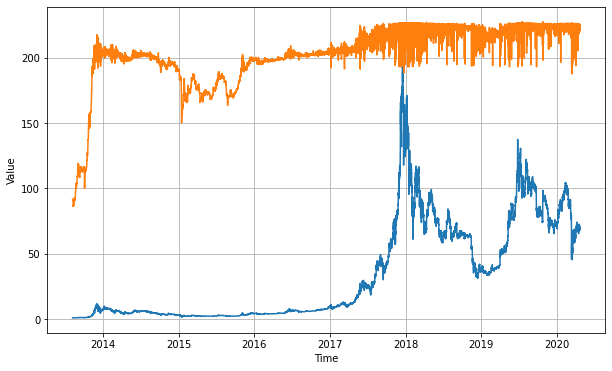

In [70]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid/100)
plot_series(time_valid, rnn_forecast)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()



zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()